# BPP Problem Solution
Using qiskit/cplex and Dwave Ocean

### Outline:
<ol>
    <li>Required installation</li>
    <li>Prepare equations/model</li>
    <li>VQE</li>
    <li>QAOA</li>
    <li>Dwave bruteforce</li>
    <li>Dwave annealer</li>
    <li>Resources</li>
    <li>Software Versions</li>
</ol>

### Required installation

In [1]:
#!pip install qiskit-optimization[cplex]
#!pip install dwave-qbsolv dwave-ocean-sdk

### Prepare equations/model

In [1]:
from Problem import *
problem = Problem(num_trucks=3, num_packets=2, weights=[1, 2], c=5)

In [2]:
problem_quadratic = problem.prepareProblemCplex()
problem_quadratic

<QuadraticProgram: minimize y1 + y2 + y3, 9 variables, 5 constraints, ''>

In [3]:
qubo_vqe_qaoa = problem.toQuboCplex(problem_quadratic)
qubo_vqe_qaoa

<QuadraticProgram: minimize 8*x11^2 + 16*x11*x12 + 8*x11*x21 + 8*x11*x31 + 8*x..., 18 variables, 0 constraints, ''>

In [4]:
qubo_dwave = problem.prepareProblemDwave()

In [5]:
from qiskit_algorithms.utils import algorithm_globals
algorithm_globals.random_seed = 12345

In [6]:
from Experiment import *
experiment = Experiment(qubo_vqe_qaoa = qubo_vqe_qaoa, qubo_dwave = qubo_dwave)

### VQE

In [7]:
qubitOp, offset = qubo_vqe_qaoa.to_ising()

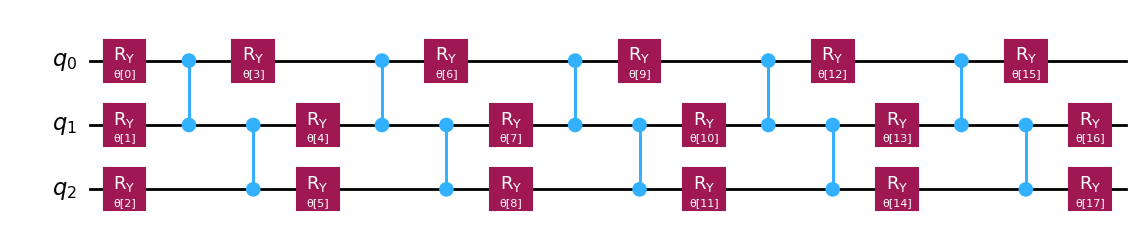

In [8]:
from qiskit.circuit.library import TwoLocal
ansatz1 = TwoLocal(3, "ry", "cz", reps=5, entanglement="linear")
ansatz1.decompose().draw('mpl')

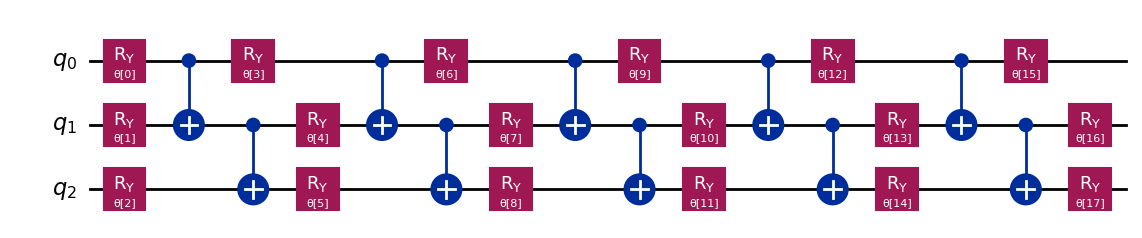

In [9]:
ansatz2 = TwoLocal(3, "ry", "cx", reps=5, entanglement="linear")
ansatz2.decompose().draw('mpl')

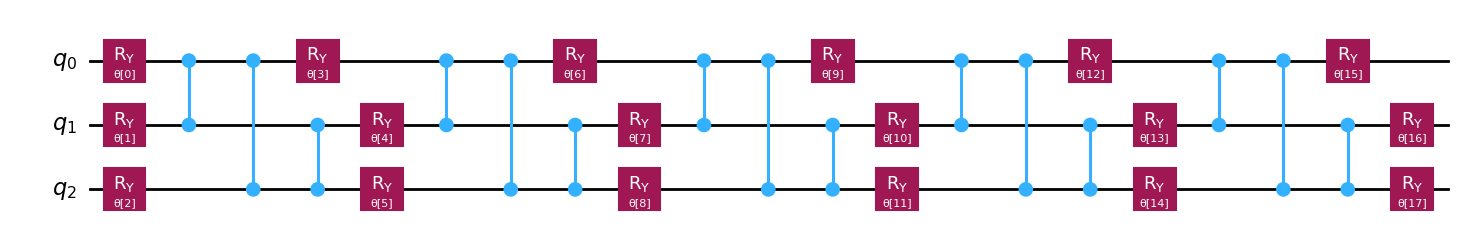

In [10]:
ansatz3 = TwoLocal(3, "ry", "cz", reps=5, entanglement="full")
ansatz3.decompose().draw('mpl')

In [11]:
import time
start_time = time.time()
result_vqe1 = experiment.runVqe(max_iter=30, ansatz=ansatz1)
print("--- %s seconds ---" % (time.time() - start_time))

--- 561.6524267196655 seconds ---


In [12]:
result_vqe1

<MinimumEigenOptimizationResult: fval=2.0, y1=0.0, y2=1.0, y3=1.0, x11=0.0, x12=0.0, x21=0.0, x22=0.0, x31=1.0, x32=1.0, xy1@int_slack@0=0.0, xy1@int_slack@1=0.0, xy1@int_slack@2=0.0, xy2@int_slack@0=1.0, xy2@int_slack@1=1.0, xy2@int_slack@2=1.0, xy3@int_slack@0=0.0, xy3@int_slack@1=1.0, xy3@int_slack@2=0.0, status=SUCCESS>

In [13]:
start_time = time.time()
result_vqe2 = experiment.runVqe(max_iter=30, ansatz=ansatz2)
print("--- %s seconds ---" % (time.time() - start_time))

--- 624.9042592048645 seconds ---


In [14]:
result_vqe2

<MinimumEigenOptimizationResult: fval=2.0, y1=1.0, y2=1.0, y3=0.0, x11=0.0, x12=0.0, x21=1.0, x22=1.0, x31=0.0, x32=0.0, xy1@int_slack@0=1.0, xy1@int_slack@1=1.0, xy1@int_slack@2=1.0, xy2@int_slack@0=0.0, xy2@int_slack@1=1.0, xy2@int_slack@2=0.0, xy3@int_slack@0=0.0, xy3@int_slack@1=0.0, xy3@int_slack@2=0.0, status=SUCCESS>

In [15]:
start_time = time.time()
result_vqe3 = experiment.runVqe(max_iter=30, ansatz=ansatz3)
print("--- %s seconds ---" % (time.time() - start_time))

--- 794.3348393440247 seconds ---


In [16]:
result_vqe3

<MinimumEigenOptimizationResult: fval=1.0, y1=0.0, y2=1.0, y3=0.0, x11=0.0, x12=0.0, x21=1.0, x22=1.0, x31=0.0, x32=0.0, xy1@int_slack@0=0.0, xy1@int_slack@1=0.0, xy1@int_slack@2=0.0, xy2@int_slack@0=0.0, xy2@int_slack@1=0.0, xy2@int_slack@2=1.0, xy3@int_slack@0=0.0, xy3@int_slack@1=0.0, xy3@int_slack@2=0.0, status=SUCCESS>

### QAOA

In [17]:
start_time = time.time()
result_qaoa = experiment.runQAOA(max_iter=30, initial_point=[0.0, 1.0])
print("--- %s seconds ---" % (time.time() - start_time))

--- 567.62628698349 seconds ---


In [18]:
result_qaoa

<MinimumEigenOptimizationResult: fval=2.0, y1=1.0, y2=1.0, y3=0.0, x11=0.0, x12=0.0, x21=1.0, x22=1.0, x31=0.0, x32=0.0, xy1@int_slack@0=1.0, xy1@int_slack@1=1.0, xy1@int_slack@2=1.0, xy2@int_slack@0=0.0, xy2@int_slack@1=1.0, xy2@int_slack@2=0.0, xy3@int_slack@0=0.0, xy3@int_slack@1=0.0, xy3@int_slack@2=0.0, status=SUCCESS>

### Dwave bruteforce

In [19]:
start_time = time.time()
experiment.bruteForce()
print("--- %s seconds ---" % (time.time() - start_time))

--- 31.351125717163086 seconds ---


### Dwave annealer

In [20]:
start_time = time.time()
experiment.annealer()
print("--- %s seconds ---" % (time.time() - start_time))

--- 0.09328460693359375 seconds ---


### Resources:
<ol>
    <li>D-wave Ocean Software Documentation: <a href="https://docs.ocean.dwavesys.com/en/stable/index.html">link</a></li>
    <li>Converters For Quadratic Program: <a href="https://qiskit-community.github.io/qiskit-optimization/tutorials/02_converters_for_quadratic_programs.html">link</a></li>
    <li>Qworld Quantum Annealing Course: <a href="https://gitlab.com/qworld/qresearch/qintern2021/12_educational-material-development-for-quantum-annealing">link</a></li>
    <li>Medium Article, How To Solve QUBO Problems Using Qiskit: <a href="https://medium.com/@shoaib6174/how-to-solve-qubo-problems-using-qiskit-f4eab6cc3061">link</a></li>
    <li>Documenting Python Code: <a href="https://realpython.com/documenting-python-code/">link</a></li>
    <li>BPP problem slides: <a href="https://mathopt.be/Slides_LaRoche_Martello.pdf">link</a></li>
</ol>

### Software versions

In [21]:
# python version
import sys
print(sys.version)
print(sys.version_info)

3.10.13 | packaged by Anaconda, Inc. | (main, Sep 11 2023, 13:24:38) [MSC v.1916 64 bit (AMD64)]
sys.version_info(major=3, minor=10, micro=13, releaselevel='final', serial=0)


In [23]:
# qiskit version
import qiskit
qiskit.version.get_version_info()

'1.0.2'

In [24]:
# dimod version
!pip show dimod

Name: dimod
Version: 0.10.17
Summary: A shared API for binary quadratic model samplers.
Home-page: https://github.com/dwavesystems/dimod
Author: D-Wave Systems Inc.
Author-email: tools@dwavesys.com
License: Apache 2.0
Location: c:\users\lenovo\anaconda3\envs\qiskitchallenge\lib\site-packages
Requires: numpy, pyparsing
Required-by: dwave-greedy, dwave-hybrid, dwave-inspector, dwave-neal, dwave-networkx, dwave-ocean-sdk, dwave-preprocessing, dwave-qbsolv, dwave-system, dwave-tabu, dwavebinarycsp, penaltymodel, penaltymodel-cache, penaltymodel-lp, penaltymodel-mip, pyqubo
